# **MLT Predictions with Solar Indices**

**Author:** Arnav Singh 
**Date:** 2024-11-17

---

## **Abstract**

For this notebook, we will use the OMNI and OCB data from the Dayside and Nightside files to get a range of MLT predictions for given features.

In [1]:
### Imports ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
nightside_df = pd.read_parquet('data/5minData.parquet')
nightside_df = nightside_df[[
    'b6_date', 'b6_mag_lat', 'b6_mlt', 'b2i_mag_lat', 
    'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_PRESSURE_nPa',
    'FLOW_SPEED__GSE_km/s', '5-M_AE_nT', 'SYM/H_INDEX_nT',
    '5-M_PC(N)-INDEX_', 'PROTON_DENSITY_n/cc', 'dFMP_dt'
]]

dayside_df = pd.read_parquet('data/Dayside.parquet')

# Create hemisphere-specific dataframes
nightsideN_df = nightside_df[
    (nightside_df['b6_mag_lat'] > 50) & 
    (nightside_df['b6_mag_lat'] < 85)
].copy().dropna()

nightsideS_df = nightside_df[
    (nightside_df['b6_mag_lat'] < -50) & 
    (nightside_df['b6_mag_lat'] > -85)
].copy().dropna()

daysideN_df = dayside_df[
    (dayside_df['OCB_mlat'] > 50) & 
    (dayside_df['OCB_mlat'] < 85)
].copy().dropna()

daysideS_df = dayside_df[
    (dayside_df['OCB_mlat'] < -50) & 
    (dayside_df['OCB_mlat'] > -85)
].copy().dropna()

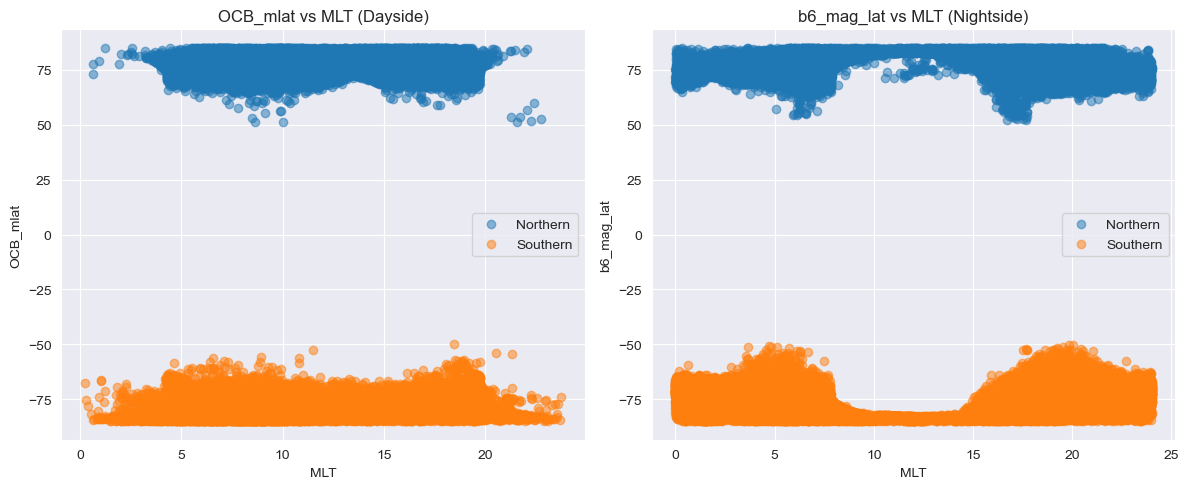

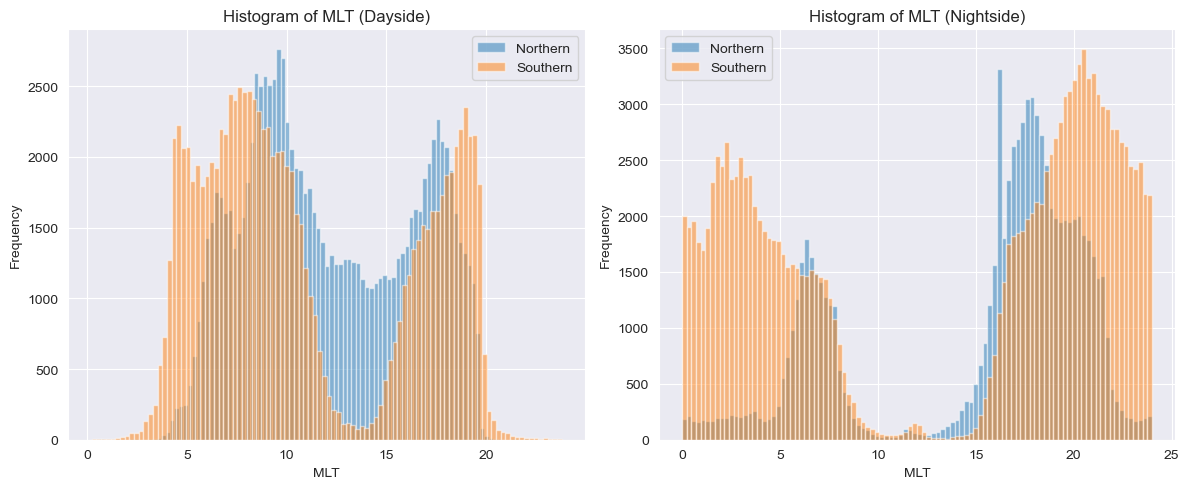

In [5]:
# Plotting OCB_mlat vs MLT for dayside data
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(daysideN_df['OCB_mlt'], daysideN_df['OCB_mlat'], alpha=0.5, label='Northern')
plt.scatter(daysideS_df['OCB_mlt'], daysideS_df['OCB_mlat'], alpha=0.5, label='Southern')
plt.xlabel('MLT')
plt.ylabel('OCB_mlat')
plt.title('OCB_mlat vs MLT (Dayside)')
plt.legend()

# Plotting b6_mag_lat vs MLT for nightside data
plt.subplot(122)
plt.scatter(nightsideN_df['b6_mlt'], nightsideN_df['b6_mag_lat'], alpha=0.5, label='Northern')
plt.scatter(nightsideS_df['b6_mlt'], nightsideS_df['b6_mag_lat'], alpha=0.5, label='Southern')
plt.xlabel('MLT')
plt.ylabel('b6_mag_lat')
plt.title('b6_mag_lat vs MLT (Nightside)')
plt.legend()

plt.tight_layout()
plt.show()

# Creating histograms of MLT
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(daysideN_df['OCB_mlt'], bins=100, alpha=0.5, label='Northern')
plt.hist(daysideS_df['OCB_mlt'], bins=100, alpha=0.5, label='Southern')
plt.xlabel('MLT')
plt.ylabel('Frequency')
plt.title('Histogram of MLT (Dayside)')
plt.legend()

plt.subplot(122)
plt.hist(nightsideN_df['b6_mlt'], bins=100, alpha=0.5, label='Northern')
plt.hist(nightsideS_df['b6_mlt'], bins=100, alpha=0.5, label='Southern')
plt.xlabel('MLT')
plt.ylabel('Frequency')
plt.title('Histogram of MLT (Nightside)')
plt.legend()

plt.tight_layout()
plt.show()

### The big Model ####


=== Training NORTH Hemisphere DAYSIDE Model ===
Epoch 1/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2082.3811 - mae: 35.0582 - val_loss: 7.7778 - val_mae: 2.1754 - learning_rate: 0.0010
Epoch 2/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 31.7377 - mae: 4.4375 - val_loss: 9.6383 - val_mae: 2.4867 - learning_rate: 0.0010
Epoch 3/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 30.1030 - mae: 4.3073 - val_loss: 6.1921 - val_mae: 1.8807 - learning_rate: 0.0010
Epoch 4/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 28.7608 - mae: 4.1988 - val_loss: 7.5448 - val_mae: 2.1470 - learning_rate: 0.0010
Epoch 5/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 27.2221 - mae: 4.0761 - val_loss: 7.7697 - val_mae: 2.1450 - learning_rate: 0.0010
Epoch 6/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 25.8849 - mae: 3.9791 - val_loss: 7.0244 - val_mae: 2.0127 - learning_rate: 0.0010
Epoch 7/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 24.6974 - mae: 3

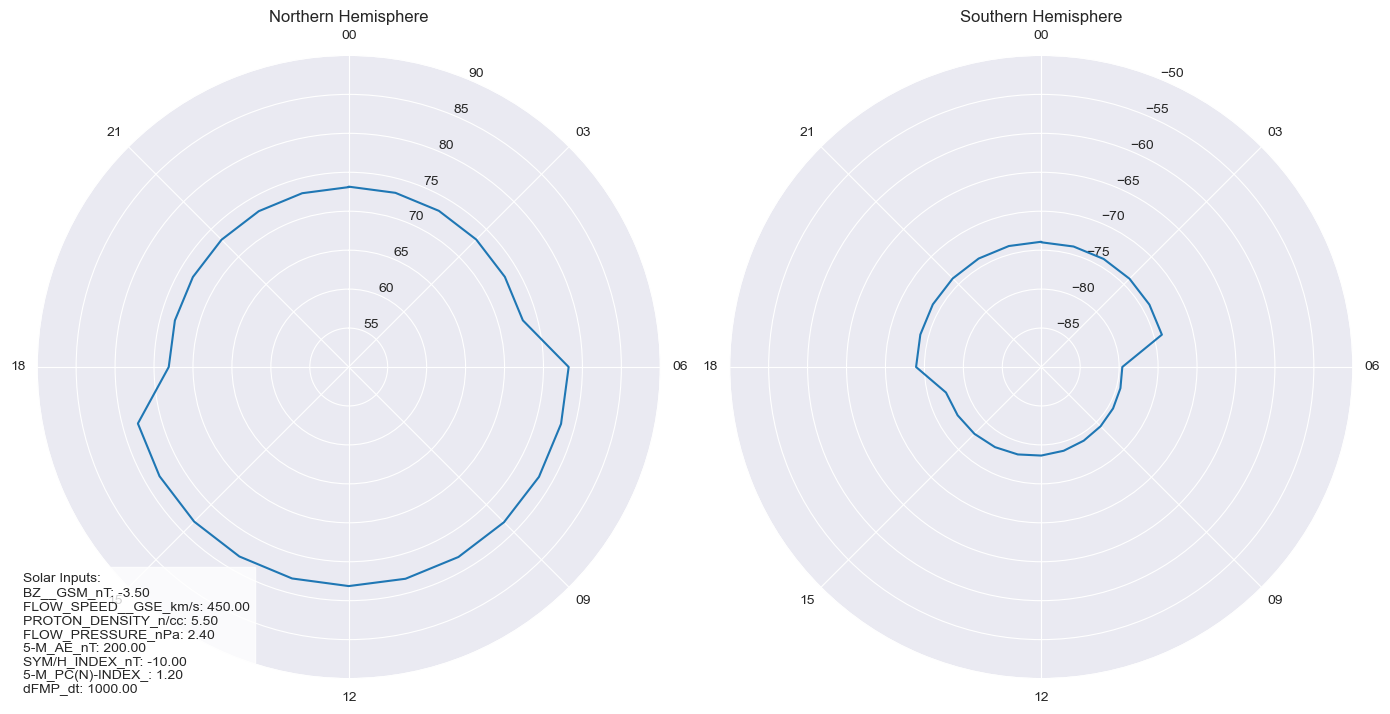

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------------------------
# 1. Load Data
# -------------------------------------------------------------------
nightside_df = pd.read_parquet('data/5minData.parquet')

# Filter for relevant columns (based on your existing nightside selection)
nightside_df = nightside_df[[
    'b6_date',
    'b6_mag_lat', 'b6_mlt', 'b2i_mag_lat',
    'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT',
    'FLOW_PRESSURE_nPa', 'FLOW_SPEED__GSE_km/s',
    '5-M_AE_nT', 'SYM/H_INDEX_nT',
    '5-M_PC(N)-INDEX_', 'PROTON_DENSITY_n/cc',
    'dFMP_dt'
]].copy()

dayside_df = pd.read_parquet('data/Dayside.parquet')
# Keep only columns that align well with the nightside feature set, plus the OCB columns
dayside_df = dayside_df[[
    'OCB_Date',         # if needed for reference
    'OCB_mlat',         # will rename to 'latitude'
    'OCB_mlt',          # will rename to 'MLT'
    'MAG_AVG_B-VECTOR_nT',
    'BZ__GSM_nT',
    'FLOW_SPEED__GSE_km/s',
    'PROTON_DENSITY_n/cc',
    'FLOW_PRESSURE_nPa',
    '5-M_AE_nT',
    'SYM/H_INDEX_nT',
    '5-M_PC(N)-INDEX_',
    'dFMP_dt'
]].copy()

# -------------------------------------------------------------------
# 2. Hemisphere Splits & Filtering
# -------------------------------------------------------------------
# Nightside
nightsideN_df = nightside_df[
    (nightside_df['b6_mag_lat'] > 50) & (nightside_df['b6_mag_lat'] < 85)
].dropna().copy()

nightsideS_df = nightside_df[
    (nightside_df['b6_mag_lat'] < -50) & (nightside_df['b6_mag_lat'] > -85)
].dropna().copy()

# Dayside
daysideN_df = dayside_df[
    (dayside_df['OCB_mlat'] > 50) & (dayside_df['OCB_mlat'] < 85)
].dropna().copy()

daysideS_df = dayside_df[
    (dayside_df['OCB_mlat'] < -50) & (dayside_df['OCB_mlat'] > -85)
].dropna().copy()

# -------------------------------------------------------------------
# 3. Standardize Column Names
#    We'll rename OCB_mlat -> latitude, OCB_mlt -> MLT for dayside
#    For nightside, rename b6_mag_lat -> latitude, b6_mlt -> MLT
# -------------------------------------------------------------------
# Nightside: North
nightsideN_df['hemisphere'] = 'north'
nightsideN_df.rename(columns={'b6_mag_lat': 'latitude', 'b6_mlt': 'MLT'}, inplace=True)

# Nightside: South
nightsideS_df['hemisphere'] = 'south'
nightsideS_df.rename(columns={'b6_mag_lat': 'latitude', 'b6_mlt': 'MLT'}, inplace=True)

# Dayside: North
daysideN_df['hemisphere'] = 'north'
daysideN_df.rename(columns={'OCB_mlat': 'latitude', 'OCB_mlt': 'MLT'}, inplace=True)

# Dayside: South
daysideS_df['hemisphere'] = 'south'
daysideS_df.rename(columns={'OCB_mlat': 'latitude', 'OCB_mlt': 'MLT'}, inplace=True)

# -------------------------------------------------------------------
# 4. Concatenate All Data
# -------------------------------------------------------------------
all_data = pd.concat([nightsideN_df, nightsideS_df, daysideN_df, daysideS_df], ignore_index=True)

# -------------------------------------------------------------------
# 5. Choose a Common Feature Set
#    Make sure these columns exist in all_data
# -------------------------------------------------------------------
features = [
    'BZ__GSM_nT',
    'FLOW_SPEED__GSE_km/s',
    'PROTON_DENSITY_n/cc',
    'FLOW_PRESSURE_nPa',
    '5-M_AE_nT',
    'SYM/H_INDEX_nT',
    '5-M_PC(N)-INDEX_',
    'dFMP_dt',
    'MLT'  # if you want MLT as an input to the network
]
target = 'latitude'

# -------------------------------------------------------------------
# 6. Define and Use the Predictor Class
# -------------------------------------------------------------------
class PolarBoundaryPredictor:
    def __init__(self):
        self.models = {
            'north': {
                'day': None,
                'night': None
            },
            'south': {
                'day': None,
                'night': None
            }
        }
        
    def create_network(self, input_shape):
        """Create a neural network for boundary prediction"""
        model = tf.keras.Sequential([
            layers.Input(shape=(input_shape,)),
            
            layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.3),
            
            layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.2),
            
            layers.Dense(64, kernel_regularizer=regularizers.l2(1e-4)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.1),
            
            layers.Dense(1)  # Single output for latitude prediction
        ])
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )
        
        return model
    
    def train_models(self, data, features, target, epochs=30):
        """
        Train separate models for day vs. night in north vs. south hemispheres.
        Using the 'hemisphere' column for north/south,
        and splitting by MLT for day/night.
        """
        for hemisphere in ['north', 'south']:
            # Filter hemisphere data
            hemi_data = data[data['hemisphere'] == hemisphere].copy()
            
            # Split day/night by MLT
            # Day: MLT 6-18, Night: MLT <6 or >=18
            day_data = hemi_data[(hemi_data['MLT'] >= 6) & (hemi_data['MLT'] < 18)]
            night_data = hemi_data[(hemi_data['MLT'] < 6) | (hemi_data['MLT'] >= 18)]
            
            # Prepare for model input
            X_day = day_data[features].values
            y_day = day_data[target].values
            
            X_night = night_data[features].values
            y_night = night_data[target].values
            
            # Create new networks
            self.models[hemisphere]['day'] = self.create_network(len(features))
            self.models[hemisphere]['night'] = self.create_network(len(features))
            
            # Callbacks
            callbacks = [
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=5,
                    restore_best_weights=True
                ),
                tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.2,
                    patience=3,
                    min_lr=1e-6
                )
            ]
            
            print(f"\n=== Training {hemisphere.upper()} Hemisphere DAYSIDE Model ===")
            self.models[hemisphere]['day'].fit(
                X_day, y_day,
                epochs=epochs,
                batch_size=32,
                validation_split=0.2,
                callbacks=callbacks,
                verbose=1
            )
            
            print(f"\n=== Training {hemisphere.upper()} Hemisphere NIGHTSIDE Model ===")
            self.models[hemisphere]['night'].fit(
                X_night, y_night,
                epochs=epochs,
                batch_size=32,
                validation_split=0.2,
                callbacks=callbacks,
                verbose=1
            )
    
    def predict_boundary(self, solar_inputs, mlt_values=None):
        """
        Predict boundary latitudes for an array of MLT values using the
        day or night models for each hemisphere. 
        'solar_inputs' is a dict with keys matching 'features' except 'MLT'.
        """
        if mlt_values is None:
            mlt_values = np.linspace(0, 24, 25)  # one hour increments
        
        # We will store predictions for both hemispheres
        results = {'north': [], 'south': []}
        
        # Convert solar_inputs to an array (in feature order)
        feature_keys = list(solar_inputs.keys())  # must match order in 'features'
        base_array = np.array([solar_inputs[k] for k in feature_keys])
        
        for hemisphere in ['north', 'south']:
            hemisphere_preds = []
            for mlt in mlt_values:
                # Choose day or night model
                if 6 <= mlt < 18:
                    model = self.models[hemisphere]['day']
                else:
                    model = self.models[hemisphere]['night']
                
                # Insert MLT into the feature vector
                arr_with_mlt = base_array.copy()
                if 'MLT' in feature_keys:
                    mlt_idx = feature_keys.index('MLT')
                    arr_with_mlt[mlt_idx] = mlt
                
                pred = model.predict(arr_with_mlt.reshape(1, -1), verbose=0)[0][0]
                hemisphere_preds.append(pred)
            
            results[hemisphere] = hemisphere_preds
        
        return results, mlt_values
    
    def plot_boundaries(self, results, mlt_values, solar_inputs):
        """
        Quick polar plot to visualize latitudes as a function of MLT
        for both hemispheres.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7),
                                      subplot_kw={'projection': 'polar'})
        
        # Convert MLT (hours) -> degrees -> radians
        theta = np.radians(mlt_values * 15.0)
        
        # Northern Hemisphere
        ax1.plot(theta, results['north'], label='Predicted OCB')
        ax1.set_title('Northern Hemisphere')
        ax1.set_theta_zero_location('N')
        ax1.set_theta_direction(-1)
        ax1.set_rlim(50, 90)  # lat range
        
        # Southern Hemisphere
        # If lat is negative, you can flip sign or just plot negative radially:
        ax2.plot(theta, results['south'], label='Predicted OCB')
        ax2.set_title('Southern Hemisphere')
        ax2.set_theta_zero_location('N')
        ax2.set_theta_direction(-1)
        ax2.set_rlim(-90, -50)
        
        # MLT labels (every 45 deg -> 3 hours)
        mlt_labels = ['00','03','06','09','12','15','18','21']
        for ax in [ax1, ax2]:
            ax.set_xticks(np.radians(np.arange(0, 360, 45)))
            ax.set_xticklabels(mlt_labels)
        
        # Show solar inputs
        solar_str = '\n'.join([f'{k}: {v:.2f}' 
                               for k,v in solar_inputs.items() 
                               if k != 'MLT'])
        plt.figtext(0.02, 0.02, f'Solar Inputs:\n{solar_str}', 
                    fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

# -------------------------------------------------------------------
# 7. Training & Example Usage
# -------------------------------------------------------------------
if __name__ == "__main__":
    predictor = PolarBoundaryPredictor()
    
    # Train
    predictor.train_models(
        data=all_data,
        features=features,
        target=target,
        epochs=20
    )
    
    # Example solar inputs
    example_solar_inputs = {
        'BZ__GSM_nT': -3.5,
        'FLOW_SPEED__GSE_km/s': 450.0,
        'PROTON_DENSITY_n/cc': 5.5,
        'FLOW_PRESSURE_nPa': 2.4,
        '5-M_AE_nT': 200.0,
        'SYM/H_INDEX_nT': -10.0,
        '5-M_PC(N)-INDEX_': 1.2,
        'dFMP_dt': 1000,
        'MLT': 0.0  # just cause
    }
    
    # Predict
    results, mlt_vals = predictor.predict_boundary(
        solar_inputs=example_solar_inputs, 
        mlt_values=np.linspace(0, 24, 25)
    )
    
    # Plot
    predictor.plot_boundaries(results, mlt_vals, example_solar_inputs)


### Classification Model


=== Training NORTH Hemisphere DAYSIDE Model ===
Epoch 1/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.1415 - loss: 2.7433 - val_accuracy: 0.1926 - val_loss: 2.5075 - learning_rate: 0.0010
Epoch 2/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1614 - loss: 2.6264 - val_accuracy: 0.2025 - val_loss: 2.5009 - learning_rate: 0.0010
Epoch 3/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1629 - loss: 2.6195 - val_accuracy: 0.1960 - val_loss: 2.4884 - learning_rate: 0.0010
Epoch 4/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1652 - loss: 2.6148 - val_accuracy: 0.2028 - val_loss: 2.4878 - learning_rate: 0.0010
Epoch 5/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1652 - loss: 2.6129 - val_accuracy: 0.2009 - val_loss: 2.4862 - learning_rate: 0.0010
Epoch 6/20
3332/3332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1648 - loss: 2.6136 - val_accuracy: 0.1990 - val_loss: 2.4869 - learning_rate: 0.0010
Epoch 7/20
3332/3332 ━━━━━━

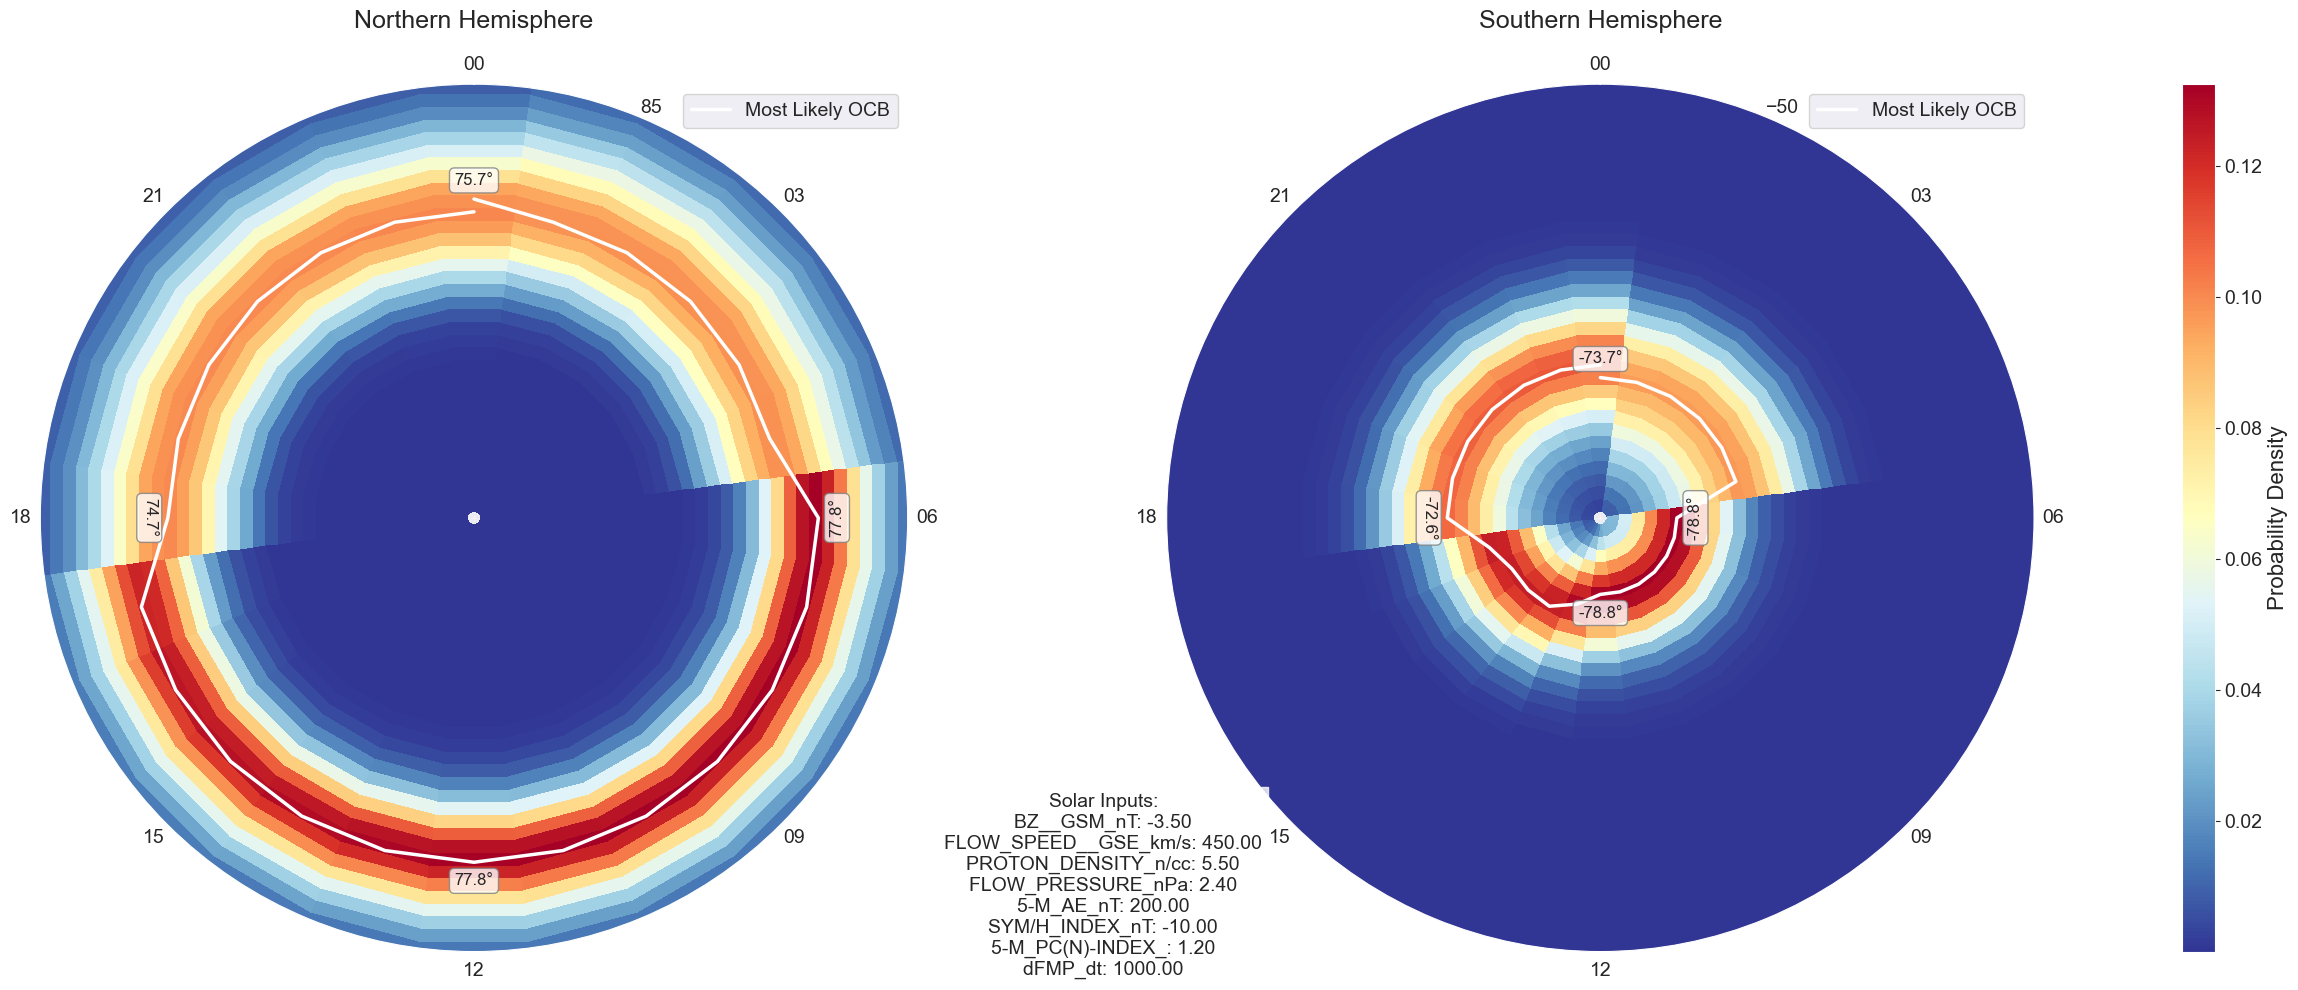

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class ProbabilisticOCBPredictor:
    def __init__(self, n_latitude_bins=35):
        self.models = {
            'north': {
                'day': None,
                'night': None
            },
            'south': {
                'day': None,
                'night': None
            }
        }
        # Define latitude bins (we'll use these for our probability distribution)
        self.n_bins = n_latitude_bins
        self.north_bins = np.linspace(50, 85, n_latitude_bins)
        self.south_bins = np.linspace(-85, -50, n_latitude_bins)
        self.bin_width = (85 - 50) / (n_latitude_bins - 1)
        
    def create_network(self, input_shape):
        """Create a neural network that outputs a probability distribution"""
        model = tf.keras.Sequential([
            layers.Input(shape=(input_shape,)),
            
            layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.3),
            
            layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.2),
            
            layers.Dense(64, kernel_regularizer=regularizers.l2(1e-4)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.1),
            
            # Output layer with n_bins neurons (probability for each latitude bin)
            layers.Dense(self.n_bins),
            layers.Activation('softmax')  # Ensures outputs sum to 1
        ])
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def _prepare_target_distribution(self, true_latitude, hemisphere='north'):
        """Convert single latitude value to probability distribution"""
        bins = self.north_bins if hemisphere == 'north' else self.south_bins
        
        # Create a Gaussian distribution centered on the true latitude
        sigma = self.bin_width * 2  # Width of the distribution
        dist = np.zeros(self.n_bins)
        
        for i, bin_center in enumerate(bins):
            dist[i] = np.exp(-0.5 * ((bin_center - true_latitude) / sigma) ** 2)
        
        # Normalize to sum to 1
        dist = dist / np.sum(dist)
        return dist
    
    def train_models(self, data, features, target, epochs=30):
        """Train separate models for day vs. night in north vs. south hemispheres"""
        for hemisphere in ['north', 'south']:
            hemi_data = data[data['hemisphere'] == hemisphere].copy()
            
            # Split day/night by MLT
            day_data = hemi_data[(hemi_data['MLT'] >= 6) & (hemi_data['MLT'] < 18)]
            night_data = hemi_data[(hemi_data['MLT'] < 6) | (hemi_data['MLT'] >= 18)]
            
            # Prepare inputs
            X_day = day_data[features].values
            X_night = night_data[features].values
            
            # Convert target latitudes to probability distributions
            y_day = np.array([
                self._prepare_target_distribution(lat, hemisphere)
                for lat in day_data[target].values
            ])
            y_night = np.array([
                self._prepare_target_distribution(lat, hemisphere)
                for lat in night_data[target].values
            ])
            
            # Create and train models
            self.models[hemisphere]['day'] = self.create_network(len(features))
            self.models[hemisphere]['night'] = self.create_network(len(features))
            
            callbacks = [
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=5,
                    restore_best_weights=True
                ),
                tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.2,
                    patience=3,
                    min_lr=1e-6
                )
            ]
            
            print(f"\n=== Training {hemisphere.upper()} Hemisphere DAYSIDE Model ===")
            self.models[hemisphere]['day'].fit(
                X_day, y_day,
                epochs=epochs,
                batch_size=32,
                validation_split=0.2,
                callbacks=callbacks,
                verbose=1
            )
            
            print(f"\n=== Training {hemisphere.upper()} Hemisphere NIGHTSIDE Model ===")
            self.models[hemisphere]['night'].fit(
                X_night, y_night,
                epochs=epochs,
                batch_size=32,
                validation_split=0.2,
                callbacks=callbacks,
                verbose=1
            )
    
    def predict_boundary_distribution(self, solar_inputs, mlt_values=None):
        """Predict probability distributions for boundary locations"""
        if mlt_values is None:
            mlt_values = np.linspace(0, 24, 25)
            
        results = {
            'north': {'distributions': [], 'most_likely': []},
            'south': {'distributions': [], 'most_likely': []}
        }
        
        feature_keys = list(solar_inputs.keys())
        base_array = np.array([solar_inputs[k] for k in feature_keys])
        
        for hemisphere in ['north', 'south']:
            bins = self.north_bins if hemisphere == 'north' else self.south_bins
            
            for mlt in mlt_values:
                model = self.models[hemisphere]['day'] if 6 <= mlt < 18 else self.models[hemisphere]['night']
                
                arr_with_mlt = base_array.copy()
                if 'MLT' in feature_keys:
                    mlt_idx = feature_keys.index('MLT')
                    arr_with_mlt[mlt_idx] = mlt
                
                # Get probability distribution
                dist = model.predict(arr_with_mlt.reshape(1, -1), verbose=0)[0]
                results[hemisphere]['distributions'].append(dist)
                
                # Get most likely latitude
                most_likely_idx = np.argmax(dist)
                most_likely_lat = bins[most_likely_idx]
                results[hemisphere]['most_likely'].append(most_likely_lat)
        
        return results, mlt_values
    
    def plot_boundaries(self, results, mlt_values, solar_inputs):
        """Plot probability distributions and most likely boundaries with side-by-side hemispheres"""
        # Create a wider figure for side-by-side plots
        fig = plt.figure(figsize=(24, 10))
        
        # Create a gridspec with two polar plots and one colorbar
        gs = plt.GridSpec(1, 3, width_ratios=[1, 1, 0.03])
        
        # Create subplots
        ax_north = plt.subplot(gs[0], projection='polar')
        ax_south = plt.subplot(gs[1], projection='polar')
        ax_cbar = plt.subplot(gs[2])
        
        theta = np.radians(np.array(mlt_values) * 15.0)
        
        theta_mesh, r_north = np.meshgrid(theta, self.north_bins)
        theta_mesh, r_south = np.meshgrid(theta, self.south_bins)
        
        prob_north = np.stack(results['north']['distributions']).T
        prob_south = np.stack(results['south']['distributions']).T
        
        custom_cmap = plt.cm.RdYlBu_r
        
        pcm_north = ax_north.pcolormesh(theta_mesh, r_north, prob_north, 
                                      cmap=custom_cmap, shading='auto')
        pcm_south = ax_south.pcolormesh(theta_mesh, r_south, prob_south, 
                                      cmap=custom_cmap, shading='auto')
        
        # Plot most likely boundaries
        ax_north.plot(theta, results['north']['most_likely'], 'w-', 
                     linewidth=2.5, label='Most Likely OCB')
        ax_south.plot(theta, results['south']['most_likely'], 'w-', 
                     linewidth=2.5, label='Most Likely OCB')
        
        # Add latitude annotations
        mlt_annotation_points = [0, 6, 12, 18]
        annotation_angles = np.array(mlt_annotation_points) * 15
        
        for ax, lats, hemisphere in [(ax_north, results['north']['most_likely'], 'north'),
                                   (ax_south, results['south']['most_likely'], 'south')]:
            
            for mlt_idx, mlt in enumerate(mlt_values):
                if mlt in mlt_annotation_points:
                    idx = mlt_idx
                    angle = np.radians(mlt * 15)
                    lat = lats[idx]
                    
                    if hemisphere == 'north':
                        r_offset = 1.5
                        text_lat = lat + r_offset
                    else:
                        r_offset = -1.5
                        text_lat = lat - r_offset
                    
                    rotation = np.degrees(angle)
                    if 90 < rotation < 270:
                        rotation = rotation + 180
                    
                    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
                    ax.text(angle, text_lat, f'{lat:.1f}°', 
                           ha='center', va='center',
                           rotation=rotation,
                           fontsize=12,  # Increased font size
                           bbox=bbox_props)
        
        # Customize plots
        for ax, title in [(ax_north, 'Northern Hemisphere'), 
                         (ax_south, 'Southern Hemisphere')]:
            ax.set_title(title, fontsize=18, pad=20)  # Increased font size
            ax.set_theta_zero_location('N')
            ax.set_theta_direction(-1)
            ax.legend(fontsize=14)  # Increased font size
            
            ax.set_xticks(np.radians(np.arange(0, 360, 45)))
            ax.set_xticklabels(['00','03','06','09','12','15','18','21'], 
                             fontsize=14)  # Increased font size
            
            ax.tick_params(axis='y', labelsize=14)  # Increased font size
            ax.grid(True, alpha=0.3)
        
        ax_north.set_rlim(50, 85)
        ax_south.set_rlim(-85, -50)
        
        # Add colorbar
        cbar = plt.colorbar(pcm_north, cax=ax_cbar)
        cbar.ax.tick_params(labelsize=14)  # Increased font size
        cbar.set_label('Probability Density', fontsize=16)  # Increased font size
        
        # Show solar inputs
        # Move solar inputs text to bottom center
        solar_str = '\n'.join([f'{k}: {v:.2f}' 
                              for k,v in solar_inputs.items() 
                              if k != 'MLT'])
        plt.figtext(0.5, 0.02, f'Solar Inputs:\n{solar_str}', 
                   fontsize=14, bbox=dict(facecolor='white', alpha=0.8),
                   ha='center')  # Center the text
        
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    predictor = ProbabilisticOCBPredictor()
    
    # Train with your data
    predictor.train_models(
        data=all_data,
        features=features,
        target=target,
        epochs=20
    )
    
    # Example prediction
    example_solar_inputs = {
        'BZ__GSM_nT': -3.5,
        'FLOW_SPEED__GSE_km/s': 450.0,
        'PROTON_DENSITY_n/cc': 5.5,
        'FLOW_PRESSURE_nPa': 2.4,
        '5-M_AE_nT': 200.0,
        'SYM/H_INDEX_nT': -10.0,
        '5-M_PC(N)-INDEX_': 1.2,
        'dFMP_dt': 1000,
        'MLT': 0.0
    }
    
    results, mlt_vals = predictor.predict_boundary_distribution(
        solar_inputs=example_solar_inputs,
        mlt_values=np.linspace(0, 24, 25)
    )
    
    predictor.plot_boundaries(results, mlt_vals, example_solar_inputs)